# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [32]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [33]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [34]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [35]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [36]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
#建立模型

In [39]:
model = Sequential()
model.add(Dense(256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal',activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [40]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [41]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 269us/sample - loss: 0.2365 - accuracy: 0.9291 - val_loss: 0.1104 - val_accuracy: 0.9684
Epoch 2/10
48000/48000 [==============================] - 11s 230us/sample - loss: 0.0932 - accuracy: 0.9705 - val_loss: 0.0984 - val_accuracy: 0.9703
Epoch 3/10
48000/48000 [==============================] - 11s 232us/sample - loss: 0.0626 - accuracy: 0.9800 - val_loss: 0.0880 - val_accuracy: 0.9745
Epoch 4/10
48000/48000 [==============================] - 11s 225us/sample - loss: 0.0448 - accuracy: 0.9854 - val_loss: 0.0932 - val_accuracy: 0.9740
Epoch 5/10
48000/48000 [==============================] - 11s 235us/sample - loss: 0.0364 - accuracy: 0.9879 - val_loss: 0.1127 - val_accuracy: 0.9722
Epoch 6/10
48000/48000 [==============================] - 17s 358us/sample - loss: 0.0286 - accuracy: 0.9904 - val_loss: 0.0984 - val_accuracy: 0.9745
Epoch 7/10
48000/48000 [====================

# 以圖形顯示訓練過程

In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

KeyError: 'val_acc'

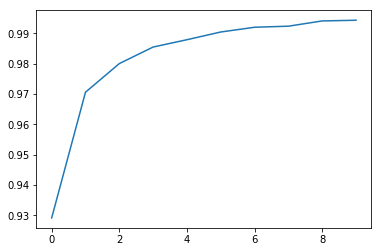

In [44]:
show_train_history(train_history,'accuracy','val_acc')

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])